In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [22]:
img_path = "/media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/valdo_png_final/images/train/sub-104_slice_034.png"
img_file = Image.open(img_path)

img_file = np.array(img_file)
np.unique(img_file)

array([  0,  18,  27,  45,  54,  57,  59,  61,  62,  66,  67,  72,  74,
        75,  76,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 216, 218, 219, 221, 222, 227,
       230, 234, 236, 241, 243, 245, 254, 255], dtype=uint8)

[  0 254 255]


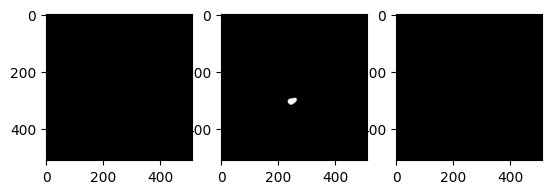

In [23]:
anomaly1 = "/media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/valdo_png_final/images/train/sub-202_slice_000.png"
anomaly1 = Image.open(anomaly1)
anomaly1 = np.array(anomaly1)

plt.subplot(1,3,1)
plt.imshow(anomaly1[:,:,0], cmap = 'gray')

plt.subplot(1,3,2)
plt.imshow(anomaly1[:,:,1], cmap = 'gray')

plt.subplot(1,3,3)
plt.imshow(anomaly1[:,:,2], cmap = 'gray')

print(np.unique(anomaly1))

In [1]:
import os
import re
from pathlib import Path
from collections import defaultdict

# >>> set your folder here <<<
ROOT_DIR = Path("/media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/csf_png/images/train")

# Safety first: start with DRY_RUN=True to preview actions
DRY_RUN = False

# Match names like: sub-202_slice_098.txt  or  sub-202_slice_098.png
# - captures subject id (e.g., sub-202)
# - captures slice number (e.g., 098 -> 98)
# - captures extension (e.g., .txt/.png)
name_re = re.compile(r"^(sub-\d+)_slice_(\d+)(\.[^.]+)$")

subjects = defaultdict(list)
exts_seen = set()
unmatched = []

# Scan directory (flat)
for p in ROOT_DIR.iterdir():
    if not p.is_file():
        continue
    m = name_re.match(p.name)
    if not m:
        unmatched.append(p.name)
        continue
    sub_id, slice_str, ext = m.groups()
    try:
        slice_num = int(slice_str)  # handles zero-padded numbers
    except ValueError:
        unmatched.append(p.name)
        continue
    subjects[sub_id].append((slice_num, p))
    exts_seen.add(ext.lower())

# Basic sanity checks and diagnostics
if not subjects:
    print(f"[ERROR] No files matched pattern in: {ROOT_DIR}")
    if unmatched:
        print("Example non-matching filenames (up to 10):")
        for nm in unmatched[:10]:
            print("  -", nm)
    raise SystemExit(1)

if len(exts_seen) > 1:
    print(f"[WARN] Multiple extensions found: {sorted(exts_seen)}")
    print("This script assumes a single extension per directory. Proceeding anyway…")
else:
    print(f"[INFO] Detected extension: {next(iter(exts_seen))}")

print(f"[INFO] Found {len(subjects)} subject(s).")

# Delete first and last slice per subject
total_deleted = 0
for sub_id, items in subjects.items():
    # items: list of (slice_num, Path)
    nums = [n for n, _ in items]
    min_n = min(nums)
    max_n = max(nums)

    # files to delete (set avoids double-deletion if only one slice exists)
    to_delete = {p for n, p in items if n == min_n or n == max_n}

    print(f"\n{sub_id}: first={min_n:03d}, last={max_n:03d} -> {len(to_delete)} file(s) to remove")
    for p in sorted(to_delete, key=lambda x: x.name):
        print(" -", p)
        if not DRY_RUN:
            try:
                p.unlink()
                total_deleted += 1
            except Exception as e:
                print(f"   [ERROR] Failed to delete {p}: {e}")

print(f"\n[SUMMARY] {'Would delete' if DRY_RUN else 'Deleted'} {total_deleted} file(s) across {len(subjects)} subject(s).")
print("[HINT] Set DRY_RUN = False to actually delete.\n")

# Extra help: if many files didn't match, show a few to diagnose naming differences
if unmatched:
    print(f"[NOTE] {len(unmatched)} file(s) did not match expected pattern. Sample:")
    for nm in sorted(unmatched)[:10]:
        print("  -", nm)


[INFO] Detected extension: .png
[INFO] Found 60 subject(s).

sub-202: first=001, last=190 -> 2 file(s) to remove
 - /media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/csf_png/images/train/sub-202_slice_001.png
 - /media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/csf_png/images/train/sub-202_slice_190.png

sub-209: first=001, last=190 -> 2 file(s) to remove
 - /media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/csf_png/images/train/sub-209_slice_001.png
 - /media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/csf_png/images/train/sub-209_slice_190.png

sub-101: first=001, last=033 -> 2 file(s) to remove
 - /media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/csf_png/images/train/sub-101_slice_001.png
 - /media/Datacenter_storage/PublicDatasets/cerebral_microbleeds_VALDO/csf_png/images/train/sub-101_slice_033.png

sub-306: first=001, last=037 -> 2 file(s) to remove
 - /media/Datacenter_storage/PublicDatasets/